# Stable-Diffusion Upscaler

In [1]:
!pip install huggingface-hub==0.10.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.5/163.5 KB 4.0 MB/s eta 0:00:00


In [2]:
from huggingface_hub import notebook_login
notebook_login()

Login successful
Your token has been saved to /root/.huggingface/token


In [3]:
!pip install -qq -U diffusers transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.9/524.9 KB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 79.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 102.3 MB/s eta 0:00:00


In [4]:
pip install accelerate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.5/191.5 KB 5.5 MB/s eta 0:00:00


In [5]:
import requests
from PIL import Image
from io import BytesIO
from diffusers import StableDiffusionUpscalePipeline
import torch

In [6]:
# load model and scheduler
model_id = "stabilityai/stable-diffusion-x4-upscaler"
pipeline = StableDiffusionUpscalePipeline.from_pretrained(model_id, revision="fp16", torch_dtype=torch.float16)
pipeline = pipeline.to("cuda")

Downloading:   0%|          | 0.00/485 [00:00<?, ?B/s]

Fetching 14 files:   0%|          | 0/14 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/300 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/348 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/634 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/681M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/460 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/825 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/977 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/982 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/947M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/558 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/111M [00:00<?, ?B/s]

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


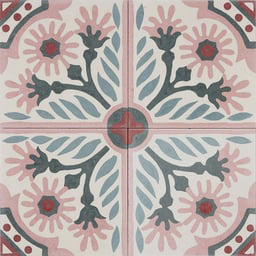

In [17]:
path = '/content/drive/My Drive/Portfolio-Full-Backup/super-resolution/inputs_for_inferences/011.jpg'
low_res_img = Image.open(path)
# low_res_img = low_res_img.resize((128, 128))
low_res_img

In [ ]:
prompt = ""
upscaled_image = pipeline(prompt=prompt, image=low_res_img).images[0]
upscaled_image